# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

**Wesley de Oliveira Mendes, 828.507**

## Tarefa 02 - Filtragem Digital - Salt e Pepper
- Objetivo
    - Aplicar técnicas fundamentais de processamento de imagens.


### Download das imagens

In [59]:
!wget 'https://homepages.cae.wisc.edu/~ece533/images/lena.png'

--2021-04-11 07:13:00--  https://homepages.cae.wisc.edu/~ece533/images/lena.png
Resolving homepages.cae.wisc.edu (homepages.cae.wisc.edu)... 144.92.13.84, 2607:f388:1082:0:279f:7b00:a091:17d7
Connecting to homepages.cae.wisc.edu (homepages.cae.wisc.edu)|144.92.13.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512673 (501K) [image/png]
Saving to: ‘lena.png.3’

lena.png.3          100%[===================>] 500.66K   555KB/s    in 0.9s    

2021-04-11 07:13:02 (555 KB/s) - ‘lena.png.3’ saved [512673/512673]



### Imports

In [60]:
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

#### Exercício 1
Utiliza técnicas de processamento de imagens para:
- Carregar uma imagem digital.
- Gerar um ruído uniforme Sal e Pimenta (Salt and Pepper) na imagem, você poderá utilizar a metodologia da sua preferência.
- Aplicar a técnica de filtragem gaussiana (GaussianBlur) na imagem ruidosa.
- Aplicar a técnica de filtragem por média (medianBlur) na imagem ruidosa.
- Apresentar os resultados.

In [61]:
# Carregar uma imagem digital.
exe1_img1 = cv.imread('lena.png')
exe1_img1 = cv.cvtColor(exe1_img1, cv.COLOR_BGR2GRAY)

In [62]:
# Gerar um ruído uniforme Sal e Pimenta (Salt and Pepper) na imagem, você poderá utilizar a metodologia da sua preferência.
def apply_salt_pepper(image, color_code):
    row, col = image.shape
    pixels_number = random.randint(300, 10000)

    for i in range(pixels_number):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        image[y_coord][x_coord] = color_code
    
    return image


def add_noise(image):
    image = apply_salt_pepper(image=image, color_code=255)
    image = apply_salt_pepper(image=image, color_code=0)
    return image

In [63]:
exe1_img1_salt_pepprer = exe1_img1.copy()
exe1_img1_salt_pepprer = add_noise(exe1_img1_salt_pepprer)

In [64]:
# Aplicar a técnica de filtragem gaussiana (GaussianBlur) na imagem ruidosa.
exe1_img1_gaussian_blur = cv.GaussianBlur(exe1_img1_salt_pepprer, (15, 15), 0)

In [65]:
# Aplicar a técnica de filtragem por média (medianBlur) na imagem ruidosa.
exe1_img1_median_blur = cv.medianBlur(exe1_img1_salt_pepprer, 9)

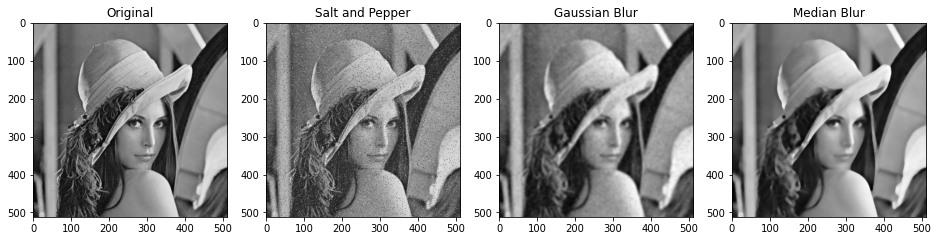

In [66]:
# Apresentar os resultados.
plt.figure(figsize=(16, 8))
plt.subplot(241), plt.imshow(exe1_img1, cmap='gray'), plt.title('Original')
plt.subplot(242), plt.imshow(exe1_img1_salt_pepprer, cmap='gray'), plt.title('Salt and Pepper')
plt.subplot(243), plt.imshow(exe1_img1_gaussian_blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(244), plt.imshow(exe1_img1_median_blur, cmap='gray'), plt.title('Median Blur')
plt.show()